#  Presented by: RASHI KAPOOR (18CSU168)
# PROBLEM STATEMENT

You are provided with a CoffeeChain dataset . By analysing the total sales and profits for Coffee Products on different dates for the year 2012, You have to predict whether it will be sold in a Major Makret or a Small Market.
Inputs: 
- Profit 
- Margin 
- Sales 
- COGS (Cost Of Goods Sold) 
- Total expenses
- Marketing
- Inventory
- Budget Profit
- Budget Margin
- Budget Sales
- Budget COGS
- Date
- Market
- State
- area code
- Market size
- Product type
- Product
- Type

Outputs:
- Market size ( 1: Major Market, 0: Small Market)

# STEP #0: LIBRARIES IMPORT

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

In [19]:
training_set1 =pd.read_excel (r'Sample - CoffeeChain.xlsx')
training_set1

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget Margin,Budget Sales,Budget COGS,Date,Market,State,Area Code,Market Size,Product Type,Product,Type
0,94,130,219,89,36,24,777,100,130,220,90,2012-01-01,Central,Colorado,719,Major Market,Coffee,Amaretto,Regular
1,68,107,190,83,39,27,623,80,110,190,80,2012-01-01,Central,Colorado,970,Major Market,Coffee,Colombian,Regular
2,101,139,234,95,38,26,821,110,140,240,100,2012-01-01,Central,Colorado,970,Major Market,Coffee,Decaf Irish Cream,Decaf
3,30,56,100,44,26,14,623,30,50,80,30,2012-01-01,Central,Colorado,303,Major Market,Tea,Green Tea,Regular
4,54,80,134,54,26,15,456,70,90,150,60,2012-01-01,Central,Colorado,303,Major Market,Espresso,Caffe Mocha,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,19,32,60,24,19,7,567,20,30,50,20,2013-12-01,West,Washington,206,Small Market,Espresso,Caffe Latte,Regular
4244,34,80,155,65,57,24,403,30,80,140,60,2013-12-01,West,Washington,509,Small Market,Espresso,Caffe Mocha,Regular
4245,76,96,188,80,45,24,1079,60,100,170,70,2013-12-01,West,Washington,360,Small Market,Espresso,Decaf Espresso,Decaf
4246,86,104,188,72,46,23,461,80,120,200,80,2013-12-01,West,Washington,360,Small Market,Coffee,Colombian,Regular


# STEP #2: EXPLORE/VISUALIZE DATASET

In [20]:
Major = training_set1[training_set1['Market Size']=='Major Market']
Small = training_set1[training_set1['Market Size']== 'Small Market']

In [21]:
print("Total =", len(training_set1))

print("No. of Products sold in a Major Market =", len(Major))
print("Percentage of products sold in a Major Market =", 1.*len(Major)/len(training_set1)*100.0, "%")
 
print("Number of Products sold in a Small Market =", len(Small))
print("Percentage of products sold in a Small Market =", 1.*len(Small)/len(training_set1)*100.0, "%")

Total = 4248
No. of Products sold in a Major Market = 1704
Percentage of products sold in a Major Market = 40.11299435028249 %
Number of Products sold in a Small Market = 2544
Percentage of products sold in a Small Market = 59.887005649717516 %


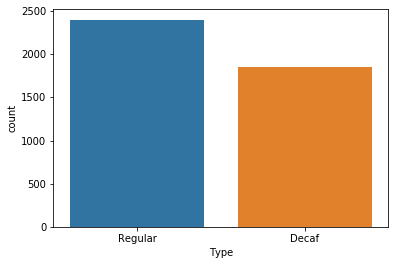

In [22]:
sns.countplot(x='Type', data= training_set1)

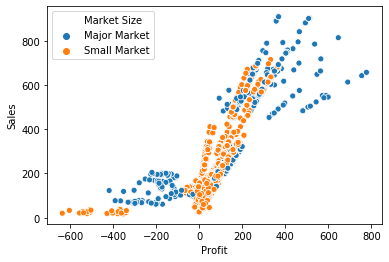

In [23]:
sns.scatterplot(training_set1['Profit'], training_set1['Sales'], hue = training_set1['Market Size'])

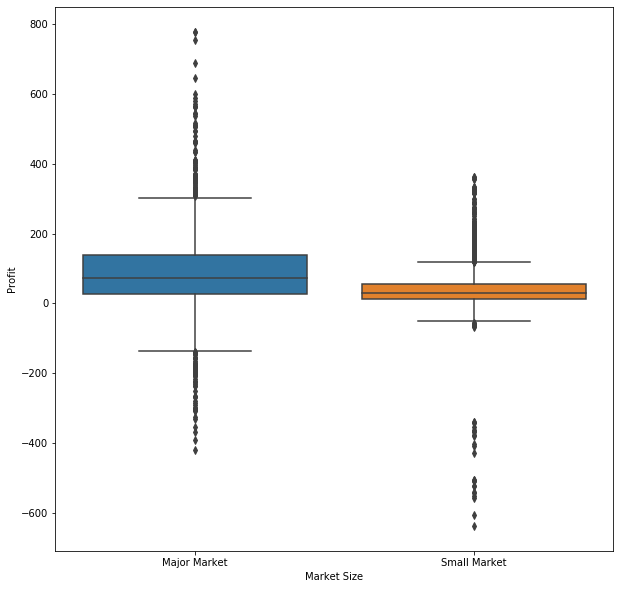

In [24]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Market Size', y='Profit',data=training_set1)

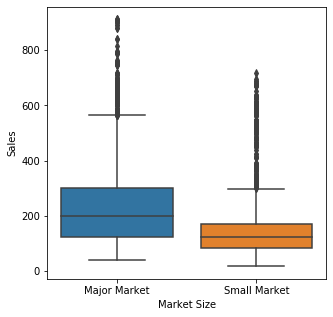

In [25]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Market Size', y='Sales',data=training_set1)

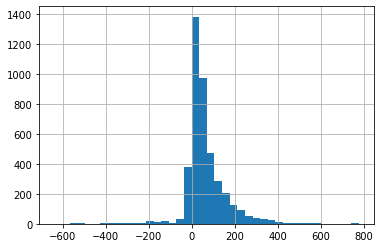

In [26]:
training_set1['Profit'].hist(bins = 40)

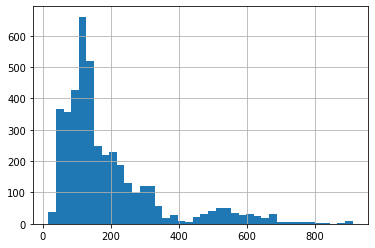

In [27]:
training_set1['Sales'].hist(bins = 40)

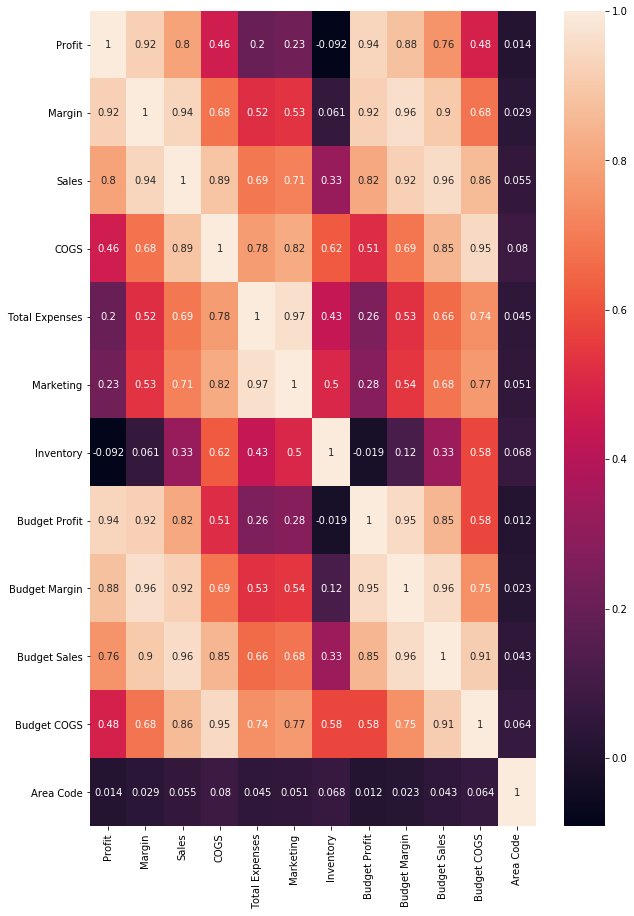

In [28]:
plt.figure(figsize=(10,15))
sns.heatmap(training_set1.corr(),annot=True)

# STEP #3: PREPARE THE DATA FOR TRAINING/ DATA CLEANING 

In [29]:
training_set= training_set1.replace(to_replace =["Small Market","Major Market"],value =["0","1"])

In [30]:
training_set.drop(['Margin', 'COGS', 'Total Expenses','Marketing','Inventory','Budget Profit','Budget Margin','Budget Sales','Budget COGS','Date','Market','State','Area Code','Type','Product Type','Product'],axis=1,inplace=True)

In [31]:
training_set

,Profit,Sales,Market Size
0,94,219,1
1,68,190,1
2,101,234,1
3,30,100,1
4,54,134,1
...,...,...,...
4243,19,60,0
4244,34,155,0
4245,76,188,0
4246,86,188,0


In [32]:
X = training_set.drop('Market Size',axis=1).values
y = training_set['Market Size'].values

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# STEP#4: MODEL TRAINING

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
X_train

array([[-0.59095101, -0.65504617],
       [ 0.33336725,  0.19860642],
       [-0.69911591, -0.48960962],
       ...,
       [-0.59095101, -0.32417307],
       [ 0.05803841, -0.12564922],
       [ 0.77586003,  1.01255425]])

In [37]:
y_train

array(['0', '1', '0', ..., '0', '0', '1'], dtype=object)

In [38]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# STEP#5: MODEL TESTING

In [40]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array(['0', '0', '0', ..., '0', '0', '1'], dtype=object)

In [41]:
y_train

array(['0', '1', '0', ..., '0', '0', '1'], dtype=object)

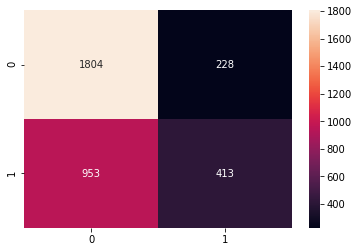

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

TN= 1804 , FN = 953 , FP = 228 , TP = 413

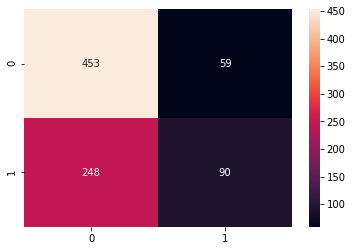

In [44]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

TN = 453, FN = 248 , FP = 59 , TP = 90

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75       512
           1       0.60      0.27      0.37       338

    accuracy                           0.64       850
   macro avg       0.63      0.58      0.56       850
weighted avg       0.63      0.64      0.60       850



In [46]:
from sklearn import metrics

In [47]:
print("Accuracy:" , metrics.accuracy_score(y_test, y_predict_test))

Accuracy: 0.6388235294117647


# STEP #6: VISUALIZING TRAINING AND TESTING DATASETS

In [48]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

# Create a meshgrid ranging from the minimum to maximum value for both features

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


In [49]:
y_train.shape

(3398,)

In [50]:
X_train.shape

(3398, 2)

(-2.1579732845494477, 5.752026715450384)

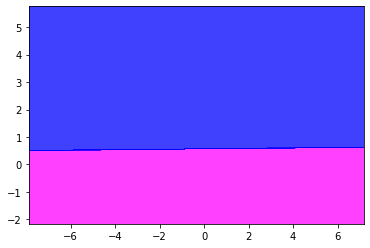

In [51]:
# plot the boundary using the trained classifier
# Run the classifier to predict the outcome on all pixels with resolution of 0.01
# Colouring the pixels with 0 or 1
#If classified as 0 it will be magenta, and if it is classified as 1 it will be shown in blue
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


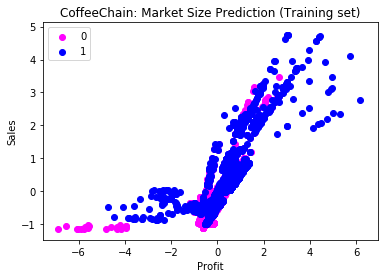

In [52]:
# plot all the actual training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
    
plt.title('CoffeeChain: Market Size Prediction (Training set)')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


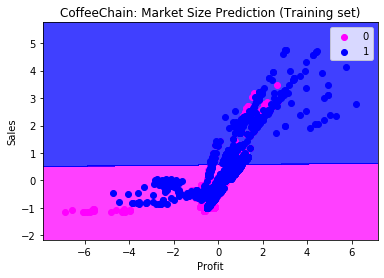

In [53]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('CoffeeChain: Market Size Prediction (Training set)')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


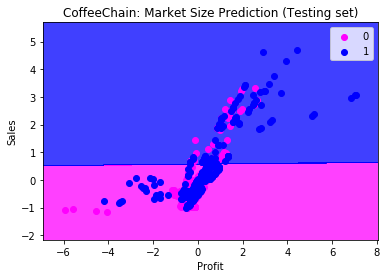

In [54]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('CoffeeChain: Market Size Prediction (Testing set)')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.legend()
plt.show()